In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [358]:
with open('./Downloads/rawdata.csv','r') as f:
    raw_data=f.readlines()

In [359]:
raw_data[0]

'\ufeff1,1.000,0.000,0.000,0.000,0.000,0.000,0.625,0.714,0.382,0.688,0.560,0.500\n'

In [360]:
rnames=['ID','Large B/P','Large ROE','Large S/P','Large Return Rate','Large Market Value','Small systematic Risk','Annual Return','Excess Return','Systematic Risk','Total Risk','Abs. Win Rate','Rel. Win Rate']
rdatas=pd.read_table('./Downloads/rawdata.csv', sep=',', header=None, names=rnames,engine = 'python') 
rdatas=rdatas.drop(0)
rdatas.head(10)

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.599,0.431,0.737,0.634,0.68,0.725
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.518,0.590,0.443,0.777,0.56,0.200
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.396,0.320,0.682,0.788,0.32,0.500
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.219,0.351,0.381,0.200,0.56,0.275
5,6,0.0,0.0,0.0,0.0,0.0,1.0,0.262,0.243,0.620,0.679,0.44,0.350
6,7,0.5,0.5,0.0,0.0,0.0,0.0,0.800,0.778,0.462,0.460,0.80,0.650
7,8,0.5,0.0,0.5,0.0,0.0,0.0,0.627,0.693,0.415,0.716,0.56,0.350
8,9,0.0,0.5,0.5,0.0,0.0,0.0,0.593,0.572,0.536,0.630,0.44,0.575
9,10,0.5,0.0,0.0,0.5,0.0,0.0,0.502,0.682,0.263,0.390,0.68,0.425
10,11,0.0,0.5,0.0,0.5,0.0,0.0,0.651,0.481,0.738,0.736,0.56,0.650


In [361]:
rdatas.describe()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,127.000000,0.163299,0.167283,0.167283,0.167283,0.167283,0.167283,0.542602,0.567625,0.428088,0.429259,0.537036,0.542143
std,72.601653,0.191351,0.198225,0.198225,0.198225,0.198225,0.198225,0.146030,0.135828,0.140541,0.145812,0.140689,0.142576
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,64.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450500,0.486000,0.324500,0.319000,0.457000,0.425000
50%,127.000000,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.556000,0.578000,0.412000,0.399000,0.560000,0.533000
75%,189.500000,0.291500,0.333000,0.333000,0.333000,0.333000,0.333000,0.655500,0.670000,0.506500,0.515000,0.629000,0.650000
max,252.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [362]:
X=np.zeros((251,7))
Y=np.zeros((251,6))

In [363]:
data_array=rdatas.values

In [364]:
X=data_array[0:250,1:7]
Y=data_array[0:250,7:13]

In [365]:
X_train=X[0:210]
X_test=X[210:250]
Y_train=Y[0:210]
Y_test=Y[210:250]

In [366]:
W=np.dot(X_train.T,X_train)
W=np.array(W,dtype='float')
W=np.linalg.inv(W)

In [367]:
Y_train=np.array(Y_train,dtype='float')
b=np.dot(X_train.T,Y_train)

In [368]:
W=np.dot(W,b)

In [369]:
err=Y_train.T-np.dot(W.T,X_train.T)
err=np.dot(err.T,err)
err=np.sum(err)
err

3.3270452760580937e-06

In [370]:
arfa=0.5
max_iteration=10000
tolerance_converge=1
def standard_GD(X,Y,arfa,max_i,lamda_ini,tolerance):
    n=X.shape[1]
    m=Y.shape[1]
    lamda=lamda_ini*np.eye(n,n)
    res_err=[]
    W_final=np.zeros((n,m))
    for i in range(0,max_i):
        W=lamda+np.dot(X.T,X)
        W=np.array(W,dtype='float')
        W=np.linalg.inv(W)
        Y=np.array(Y,dtype='float')
        b=np.dot(X.T,Y)
        W=np.dot(W,b)
        err=Y.T-np.dot(W.T,X.T)
        err=np.dot(err.T,err)
        err=np.sum(err)
        res_err.append(err)
        if i==max_i or err<tolerance:
            W_final=W
            break
        else:
            A=lamda+np.dot(X.T,X)
            A=np.dot(A.T,A)
            A=np.linalg.inv(A)
            B=np.dot(W,b.T)
            lamda=lamda-arfa*np.linalg.norm(np.dot(B,A))
    
    return(res_err,W_final)       
            

In [371]:
miu=0.01
def standard_GD_momentum(X,Y,arfa,miu,max_i,lamda_ini,tolerance):
    n=X.shape[1]
    m=Y.shape[1]
    lamda=lamda_ini*np.eye(n,n)
    res_err=[]
    W_final=np.zeros((n,m))
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    for i in range(0,max_i):
        W=lamda+np.dot(X.T,X)
        W=np.array(W,dtype='float')
        W=np.linalg.inv(W)
        Y=np.array(Y,dtype='float')
        b=np.dot(X.T,Y)
        W=np.dot(W,b)
        err=Y.T-np.dot(W.T,X.T)
        err=np.dot(err.T,err)
        err=np.sum(err)
        res_err.append(err)
        if i==max_i or err<tolerance:
            W_final=W
            break
        else:
            C=np.linalg.norm(np.dot(B,A))
            A=lamda+np.dot(X.T,X)
            A=np.dot(A.T,A)
            A=np.linalg.inv(A)
            B=np.dot(W,b.T)
            lamda=lamda-arfa*np.linalg.norm(np.dot(B,A))+miu*C
    
    return(res_err,W_final)       

In [372]:
def standard_RUD(X,Y,arfa,miu,max_i,lamda_ini,tolerance):
    n=X.shape[1]
    m=Y.shape[1]
    lamda=lamda_ini*np.eye(n,n)
    res_err=[]
    W_final=np.zeros((n,m))
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    for i in range(0,max_i):
        W=lamda+np.dot(X.T,X)
        W=np.array(W,dtype='float')
        W=np.linalg.inv(W)
        Y=np.array(Y,dtype='float')
        b=np.dot(X.T,Y)
        W=np.dot(W,b)
        err=Y.T-np.dot(W.T,X.T)
        err=np.dot(err.T,err)
        err=np.sum(err)
        res_err.append(err)
        if i==max_i or err<tolerance:
            W_final=W
            break
        else:
            C=np.linalg.norm(np.dot(B,A))
            A=lamda+np.dot(X.T,X)+arfa*C
            A=np.dot(A.T,A)
            A=np.linalg.inv(A)
            B=np.dot(W,b.T)
            lamda=lamda-arfa*np.linalg.norm(np.dot(B,A))+miu*C
    
    return(res_err,W_final)       

In [373]:
def predict_error(X,Y,W):
    err=Y.T-np.dot(W.T,X.T)
    err=np.dot(err.T,err)
    err=np.sum(err)
    return err

In [374]:
e1=predict_error(X_test,Y_test,W)
print ("The predicting error for linear regression is %f"%(e1))

The predicting error for linear regression is 39.268866


In [375]:
lamda_initial=20

In [376]:
err_list_GD=[]
(err_list_GD,W_GD)=standard_GD(X_train,Y_train,arfa,max_iteration,lamda_initial,tolerance_converge)
x1_axix=range(0,len(err_list_GD))


err_list_GD_m=[]
(err_list_GD_m,W_GD_m)=standard_GD_momentum(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x2_axix=range(0,len(err_list_GD_m))


err_list_rud=[]
(err_list_rud,W_rud)=standard_RUD(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x3_axix=range(0,len(err_list_rud))


print ("The converge iterations for GD, Momentum and RUD are %d, %d, %d"%(len(err_list_GD),len(err_list_GD_m),len(err_list_rud)))

The converge iterations for GD, Momentum and RUD are 57, 58, 59


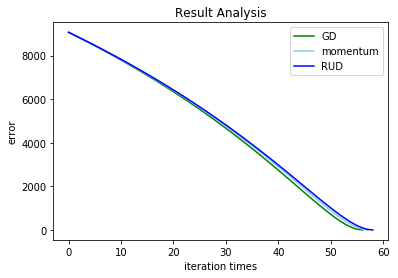

In [377]:
plt.title('Result Analysis')
plt.plot(x1_axix, err_list_GD, color='green', label='GD')
plt.plot(x2_axix, err_list_GD_m,  color='skyblue', label='momentum')
plt.plot(x3_axix, err_list_rud, color='blue', label='RUD')
plt.legend()

plt.xlabel('iteration times')
plt.ylabel('error')
plt.show()

In [378]:
e2=predict_error(X_test,Y_test,W_GD)
e3=predict_error(X_test,Y_test,W_GD_m)
e4=predict_error(X_test,Y_test,W_rud)
print ("The predicting error for ridge regression optimized by GD, Momentum and RUD are %f, %f, %f"%(e2,e3,e4))

The predicting error for ridge regression optimized by GD, Momentum and RUD are 38.703023, 38.904007, 38.567624


In [379]:
lamda_initial=30

In [380]:
err_list_GD=[]
(err_list_GD,W_GD)=standard_GD(X_train,Y_train,arfa,max_iteration,lamda_initial,tolerance_converge)
x1_axix=range(0,len(err_list_GD))


err_list_GD_m=[]
(err_list_GD_m,W_GD_m)=standard_GD_momentum(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x2_axix=range(0,len(err_list_GD_m))


err_list_rud=[]
(err_list_rud,W_rud)=standard_RUD(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x3_axix=range(0,len(err_list_rud))


print ("The converge iterations for GD, Momentum and RUD are %d, %d, %d"%(len(err_list_GD),len(err_list_GD_m),len(err_list_rud)))

The converge iterations for GD, Momentum and RUD are 10000, 123, 124


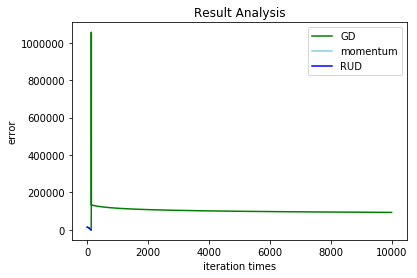

In [381]:
plt.title('Result Analysis')
plt.plot(x1_axix, err_list_GD, color='green', label='GD')
plt.plot(x2_axix, err_list_GD_m,  color='skyblue', label='momentum')
plt.plot(x3_axix, err_list_rud, color='blue', label='RUD')
plt.legend()

plt.xlabel('iteration times')
plt.ylabel('error')
plt.show()

In [382]:
e2=predict_error(X_test,Y_test,W_GD)
e3=predict_error(X_test,Y_test,W_GD_m)
e4=predict_error(X_test,Y_test,W_rud)
print ("The predicting error for ridge regression optimized by GD, Momentum and RUD are %f, %f, %f"%(e2,e3,e4))

The predicting error for ridge regression optimized by GD, Momentum and RUD are 2626.473794, 38.363669, 38.788844


In [383]:
lamda_initial=50

In [384]:
err_list_GD=[]
(err_list_GD,W_GD)=standard_GD(X_train,Y_train,arfa,max_iteration,lamda_initial,tolerance_converge)
x1_axix=range(0,len(err_list_GD))


err_list_GD_m=[]
(err_list_GD_m,W_GD_m)=standard_GD_momentum(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x2_axix=range(0,len(err_list_GD_m))


err_list_rud=[]
(err_list_rud,W_rud)=standard_RUD(X_train,Y_train,arfa,miu,max_iteration,lamda_initial,tolerance_converge)
x3_axix=range(0,len(err_list_rud))


print ("The converge iterations for GD, Momentum and RUD are %d, %d, %d"%(len(err_list_GD),len(err_list_GD_m),len(err_list_rud)))

The converge iterations for GD, Momentum and RUD are 10000, 10000, 380


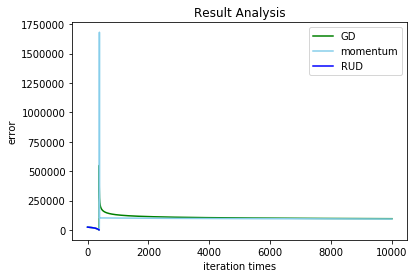

In [385]:
plt.title('Result Analysis')
plt.plot(x1_axix, err_list_GD, color='green', label='GD')
plt.plot(x2_axix, err_list_GD_m,  color='skyblue', label='momentum')
plt.plot(x3_axix, err_list_rud, color='blue', label='RUD')
plt.legend()

plt.xlabel('iteration times')
plt.ylabel('error')
plt.show()

In [386]:
e2=predict_error(X_test,Y_test,W_GD)
e3=predict_error(X_test,Y_test,W_GD_m)
e4=predict_error(X_test,Y_test,W_rud)
print ("The predicting error for ridge regression optimized by GD, Momentum and RUD are %f, %f, %f"%(e2,e3,e4))

The predicting error for ridge regression optimized by GD, Momentum and RUD are 2626.473794, 2626.473794, 38.511894


In [387]:
W_rud

array([[0.54143261, 0.60703698, 0.41719115, 0.44169451, 0.53889834,
        0.53434972],
       [0.56731323, 0.57564293, 0.44416527, 0.42932201, 0.53139165,
        0.59089812],
       [0.55445177, 0.59334022, 0.44358547, 0.46710683, 0.51948174,
        0.53722735],
       [0.52556979, 0.55261509, 0.44904916, 0.46111326, 0.50698111,
        0.52395211],
       [0.50823272, 0.53895206, 0.42805902, 0.39675653, 0.52314493,
        0.53819693],
       [0.51205126, 0.54244493, 0.44029651, 0.45548378, 0.49362997,
        0.52652292]])